In [31]:
import importlib
from SpLSI import generate_topic_model as gen_model
from SpLSI.utils import *
from SpLSI import splsi_
import numpy as np
import pandas as pd
import networkx as nx
import community as community_louvain  
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [ ]:
import networkx as nx
import community as community_louvain  
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse.linalg import svds

In [45]:
importlib.reload(gen_model)
importlib.reload(splsi_)

<module 'SpLSI.splsi_' from '/Users/zhangzeyu/Downloads/research/SpLSI/SpLSI/splsi_.py'>

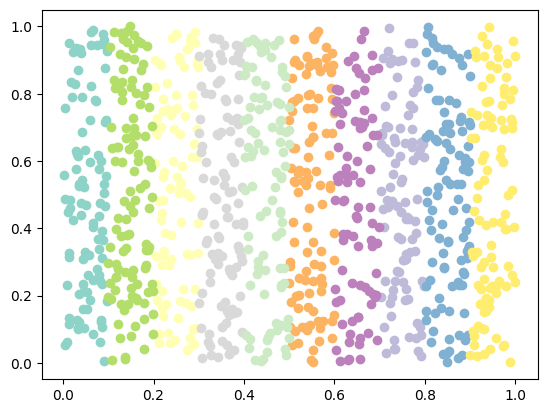

In [6]:
N = 100  # doc length
n = 1000  # number of nodes
p = 30  # vocab size
K = 10 # number of topics
r = 0.05  # heterogeneity parameter
m = 5  # number of neighbors to be considered in weights
phi = 0.1  # weight parameter
coords_df = gen_model.generate_graph(N, n, p, K, r)
gen_model.plot_scatter(coords_df)

## K = 4

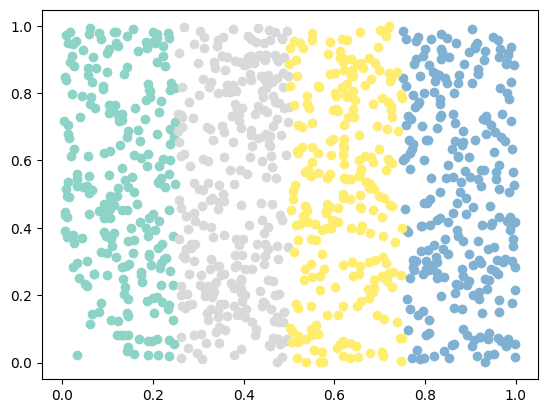

In [85]:
coords_df = gen_model.generate_graph(100, 1000, 30, 4, 0.05)
gen_model.plot_scatter(coords_df)
W = gen_model.generate_W_strong(coords_df, 100, 1000, 30, 4, 0.05) 
L = np.diag(3 * np.random.rand(min(W.shape)))
V, _ = np.linalg.qr(np.random.randn(W.shape[0], W.shape[0]))
X = W.T @ L @ V.T
weights, edge_df = gen_model.generate_weights_edge(coords_df, 3, 0.1)

In [86]:
model_hooi = splsi_.SpLSI_(lamb_start=0.001,step_size=1.2,grid_len=29,method="hooi",verbose=0,eps=1e-05,normalize=True,L_inv_=True)
model_hooi.fit(X, 4, edge_df, weights)
U = model_hooi.U

Running spatial HOSVD...
Initializing..


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxclu

Optimal lambda is 0.038443359375...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.026623333280885227...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.026623333280885227...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.026623333280885227...
SpatialSVD ran for 3 steps.
Running SPOC...


In [87]:
L1_error = get_l1_err(W, U)
moran_score, _ = moran(U, edge_df)
pas_score = get_PAS(U, edge_df)
print(f"L1 norm error between the true and predicted assignment matrices is {L1_error}")
print(f"Moran score for the predicted assignment matrices is {moran_score}")
print(f"Pas score for the predicted assignment matrices is {pas_score}")

L1 norm error between the true and predicted assignment matrices is 165.83546693849468
Moran score for the predicted assignment matrices is 0.9604507383652888
Pas score for the predicted assignment matrices is 0.946


In [88]:
L1_error = get_l1_err(W, X)
moran_score, _ = moran(X, edge_df)
pas_score = get_PAS(X, edge_df)
print(f"L1 norm error between the true and chaos matrices is {L1_error}")
print(f"Moran score for the chaos assignment matrices is {moran_score}")
print(f"Pas score for the chaos assignment matrices is {pas_score}")

L1 norm error between the true and chaos matrices is 237.16648673713738
Moran score for the chaos assignment matrices is 0.6144280116183064
Pas score for the chaos assignment matrices is 0.651


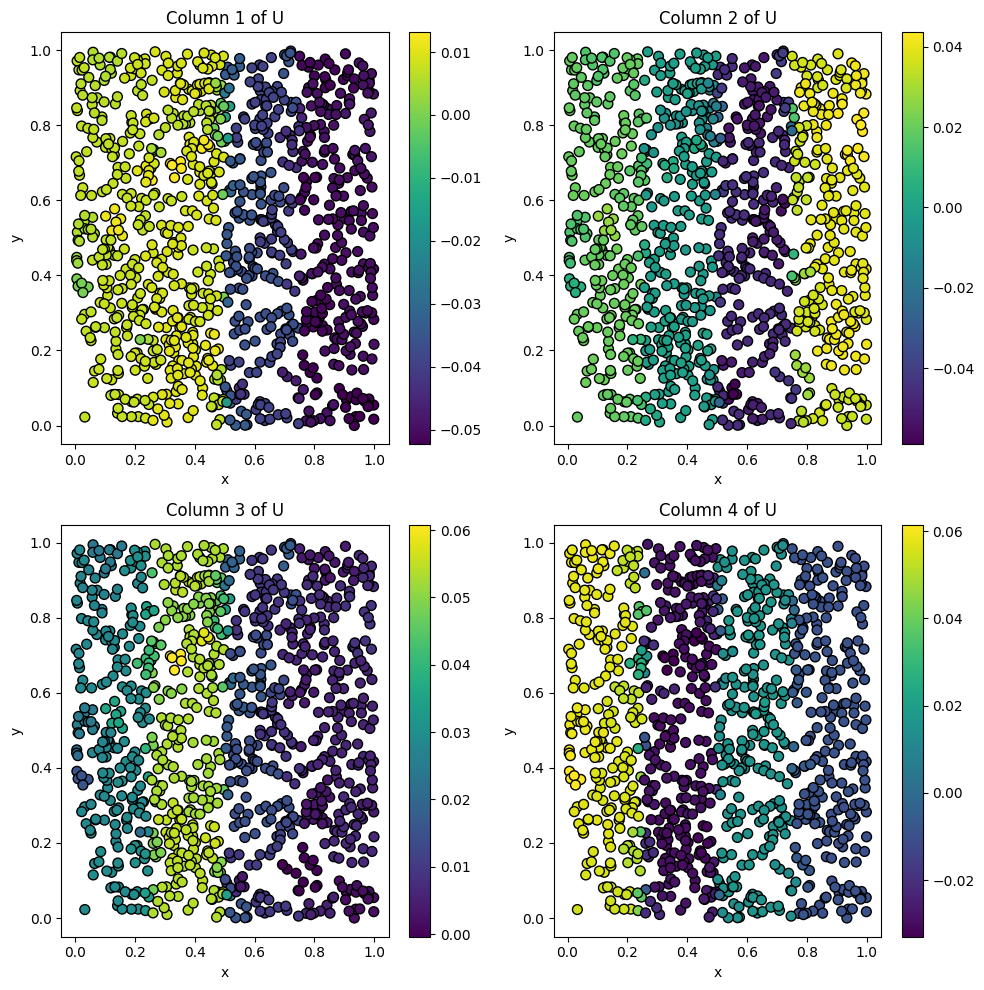

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i in range(4):
    sc = axes[i].scatter(coords_df['x'], coords_df['y'], c=U[:, i], cmap='viridis', s=50, edgecolor='k')
    axes[i].set_title(f'Column {i + 1} of U')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    plt.colorbar(sc, ax=axes[i], orientation='vertical')

plt.tight_layout()
plt.show(block=False)

## K = 6

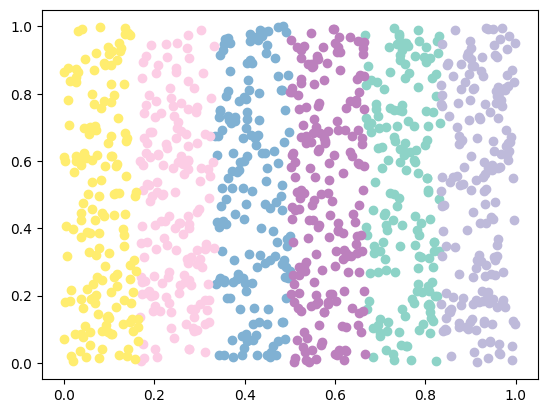

In [90]:
coords_df = gen_model.generate_graph(100, 1000, 30, 6, 0.05)
gen_model.plot_scatter(coords_df)
W = gen_model.generate_W_strong(coords_df, 100, 1000, 30, 6, 0.05) 
L = np.diag(3 * np.random.rand(min(W.shape)))
V, _ = np.linalg.qr(np.random.randn(W.shape[0], W.shape[0]))
X = W.T @ L @ V.T
weights, edge_df = gen_model.generate_weights_edge(coords_df, 3, 0.1)

In [91]:
model_hooi = splsi_.SpLSI_(lamb_start=0.001,step_size=1.2,grid_len=29,method="hooi",verbose=0,eps=1e-05,normalize=True,L_inv_=True)
model_hooi.fit(X, 6, edge_df, weights)
U = model_hooi.U

Running spatial HOSVD...
Initializing..


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Optimal lambda is 0.02562890625...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.01540702157458636...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.01540702157458636...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.01540702157458636...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.01540702157458636...
SpatialSVD ran for 4 steps.
Running SPOC...


In [92]:
L1_error = get_l1_err(W, U)
moran_score, _ = moran(U, edge_df)
pas_score = get_PAS(U, edge_df)
print(f"L1 norm error between the true and predicted assignment matrices is {L1_error}")
print(f"Moran score for the predicted assignment matrices is {moran_score}")
print(f"Pas score for the predicted assignment matrices is {pas_score}")

L1 norm error between the true and predicted assignment matrices is 184.4532264473669
Moran score for the predicted assignment matrices is 0.8910680588120075
Pas score for the predicted assignment matrices is 0.865


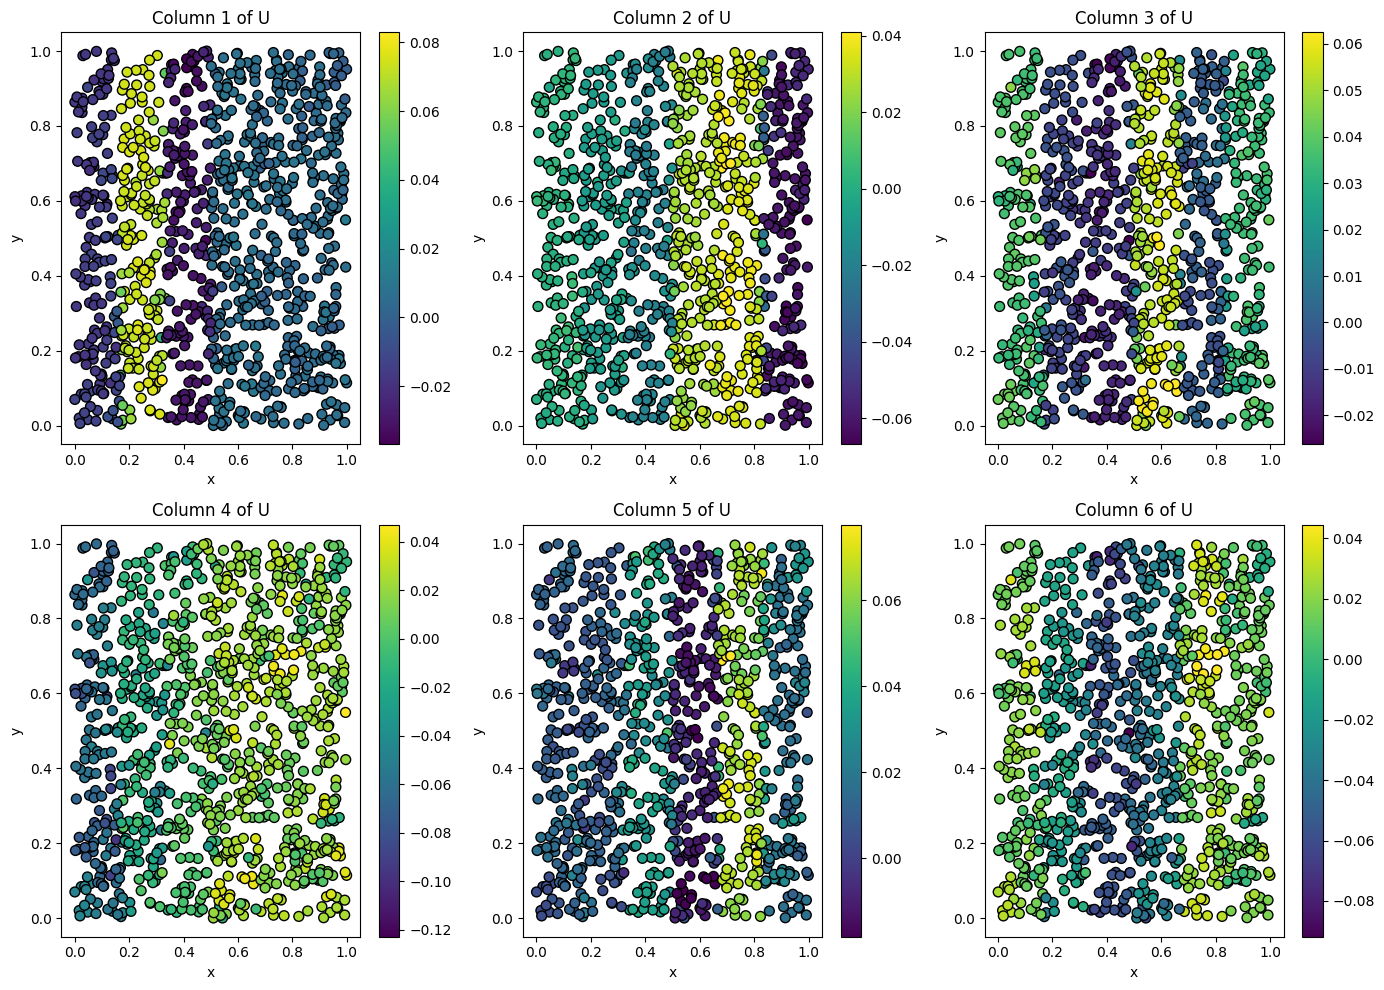

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i in range(6):
    sc = axes[i].scatter(coords_df['x'], coords_df['y'], c=U[:, i], cmap='viridis', s=50, edgecolor='k')
    axes[i].set_title(f'Column {i + 1} of U')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    plt.colorbar(sc, ax=axes[i], orientation='vertical')

plt.tight_layout()
plt.show(block=False)

## K = 8

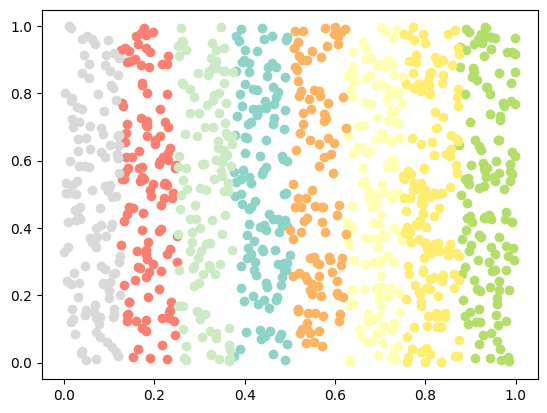

In [94]:
coords_df = gen_model.generate_graph(100, 1000, 30, 8, 0.05)
gen_model.plot_scatter(coords_df)
W = gen_model.generate_W_strong(coords_df, 100, 1000, 30, 8, 0.05) 
L = np.diag(3 * np.random.rand(min(W.shape)))
V, _ = np.linalg.qr(np.random.randn(W.shape[0], W.shape[0]))
X = W.T @ L @ V.T
weights, edge_df = gen_model.generate_weights_edge(coords_df, 3, 0.1)

In [95]:
model_hooi = splsi_.SpLSI_(lamb_start=0.001,step_size=1.2,grid_len=29,method="hooi",verbose=0,eps=1e-05,normalize=True,L_inv_=True)
model_hooi.fit(X, 8, edge_df, weights)
U = model_hooi.U

Running spatial HOSVD...
Initializing..


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxclu

Optimal lambda is 0.038443359375...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.026623333280885227...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.026623333280885227...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.026623333280885227...
SpatialSVD ran for 3 steps.
Running SPOC...


In [96]:
L1_error = get_l1_err(W, U)
moran_score, _ = moran(U, edge_df)
pas_score = get_PAS(U, edge_df)
print(f"L1 norm error between the true and predicted assignment matrices is {L1_error}")
print(f"Moran score for the predicted assignment matrices is {moran_score}")
print(f"Pas score for the predicted assignment matrices is {pas_score}")

L1 norm error between the true and predicted assignment matrices is 253.2894387131857
Moran score for the predicted assignment matrices is 0.9009256347354514
Pas score for the predicted assignment matrices is 0.857


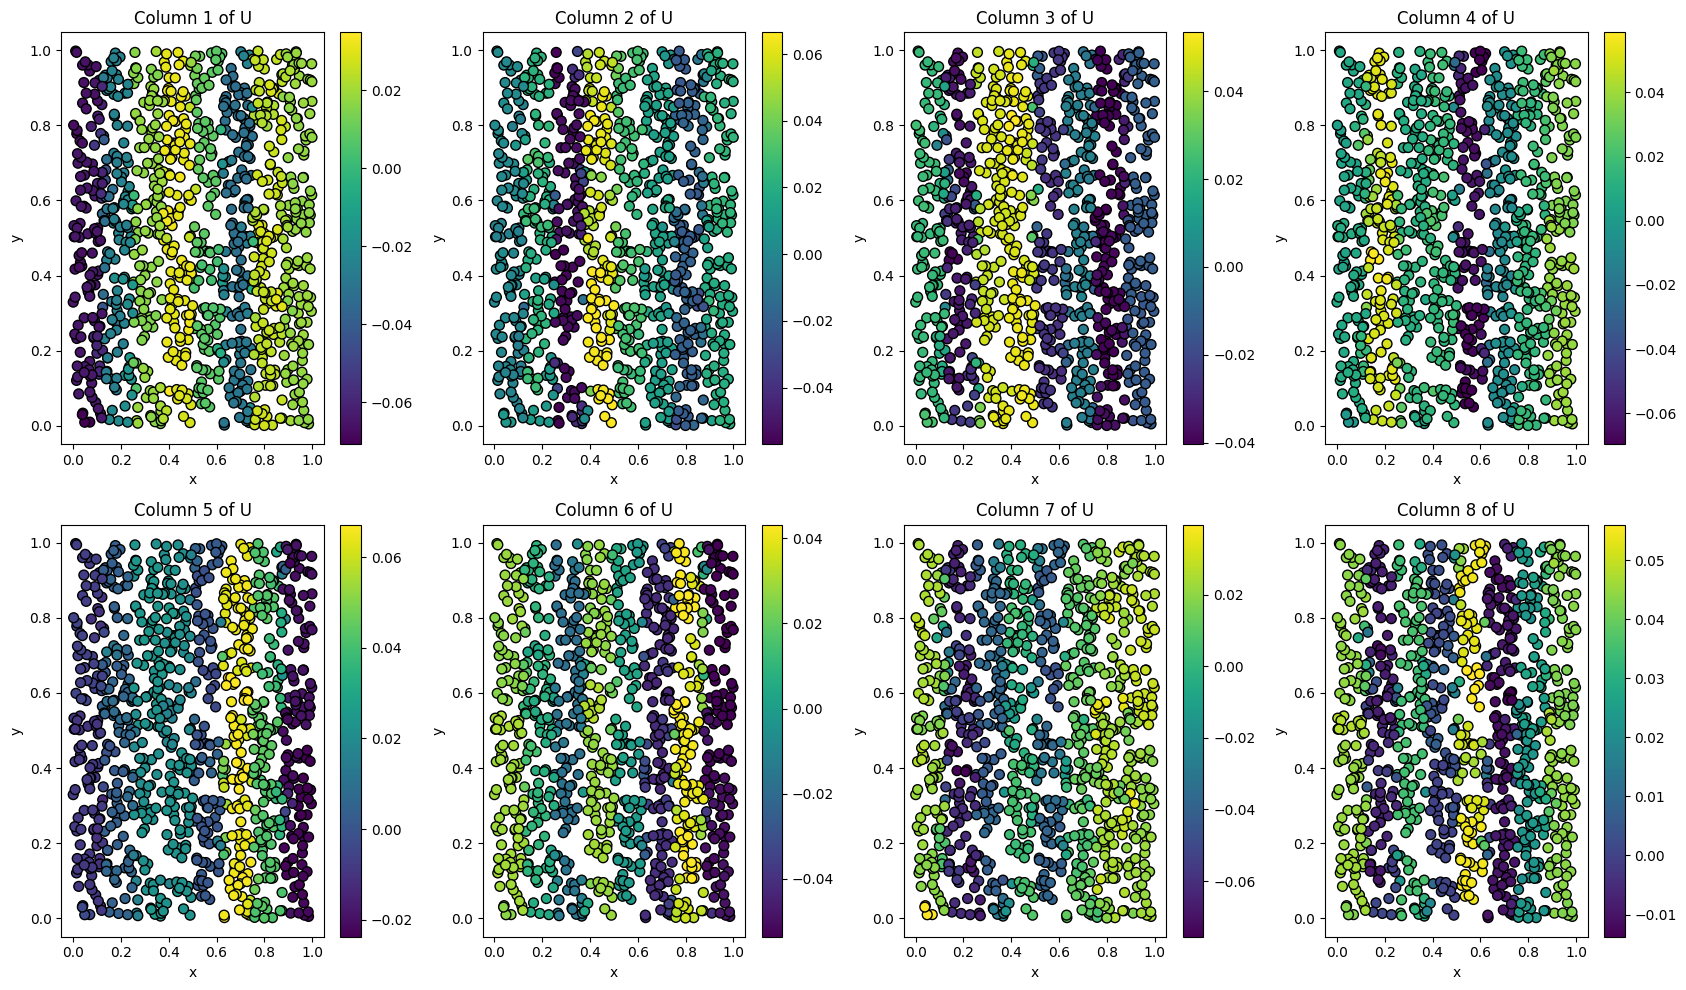

In [97]:
fig, axes = plt.subplots(2, 4, figsize=(17, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i in range(8):
    sc = axes[i].scatter(coords_df['x'], coords_df['y'], c=U[:, i], cmap='viridis', s=50, edgecolor='k')
    axes[i].set_title(f'Column {i + 1} of U')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    plt.colorbar(sc, ax=axes[i], orientation='vertical')

plt.tight_layout()
plt.show(block=False)

## K = 10